<a href="https://colab.research.google.com/github/Ashwani8525/FENN-LABS-EV/blob/main/EV_VECHILEipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the drive from google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ev_count_per_state = pd.read_csv("/content/drive/MyDrive/EV Count per State.csv")
ev_count_per_state.drop([len(ev_count_per_state)-1], axis=0, inplace=True)
ev_count_per_state.drop("Sl. No.", axis=1, inplace=True)
ev_count_per_state = ev_count_per_state.sort_values(["Number of Electric/Hybrid Vehicle (approx.)"], ascending=False)
ev_count_per_state.head()

,State/UT-wise,Number of Electric/Hybrid Vehicle (approx.)
8,Maharashtra,36708
7,Gujarat,31577
28,Uttar Pradesh,28985
2,Haryana,25908
4,Delhi,20228


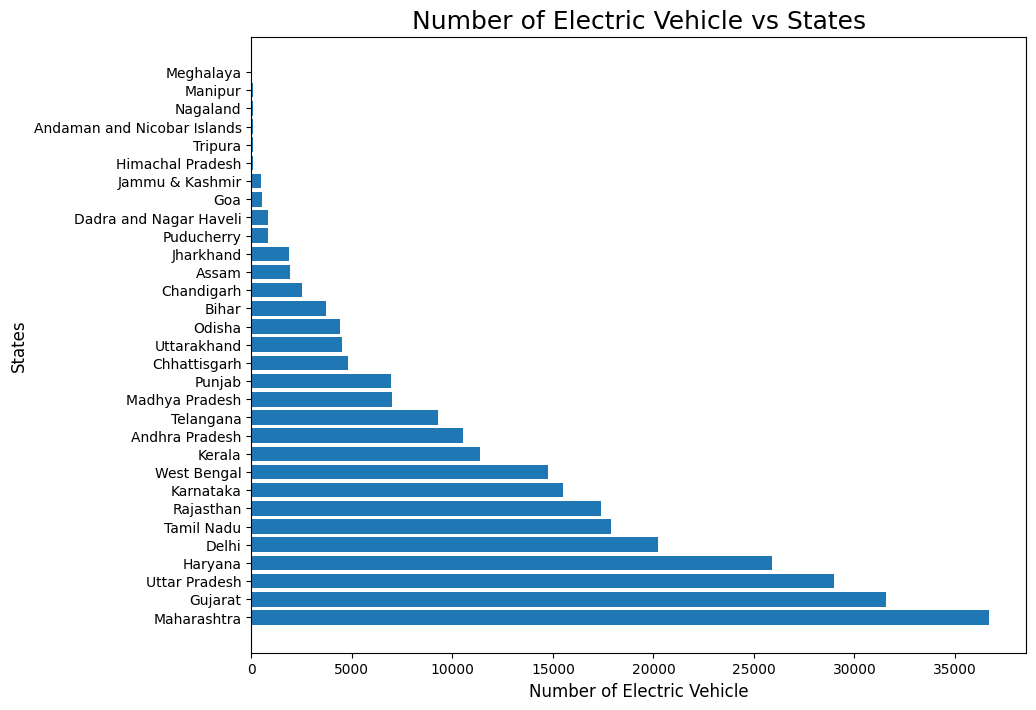

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(ev_count_per_state["State/UT-wise"], ev_count_per_state["Number of Electric/Hybrid Vehicle (approx.)"])
plt.title("Number of Electric Vehicle vs States", fontsize=18)
plt.xlabel("Number of Electric Vehicle", fontsize=12)
plt.ylabel("States", fontsize=12)
plt.xticks(rotation=0)
plt.show()

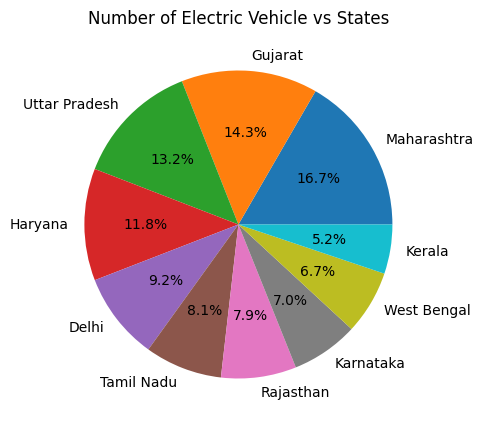

In [ ]:
top_10_count = ev_count_per_state[:10]
plt.figure(figsize=(5,5))
plt.title("Number of Electric Vehicle vs States")
plt.pie(top_10_count["Number of Electric/Hybrid Vehicle (approx.)"], labels=top_10_count["State/UT-wise"], autopct='%1.1f%%')
plt.show()

In [ ]:
charge_points_per_state = pd.read_csv("/content/drive/MyDrive/EV Charge Points.csv")
charge_points_per_state.drop([len(charge_points_per_state)-1], axis=0, inplace=True)
charge_points_per_state = charge_points_per_state.sort_values(["Number of Electric Vehicle Charging Sanctioned"], ascending=False)
charge_points_per_state.head()

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207


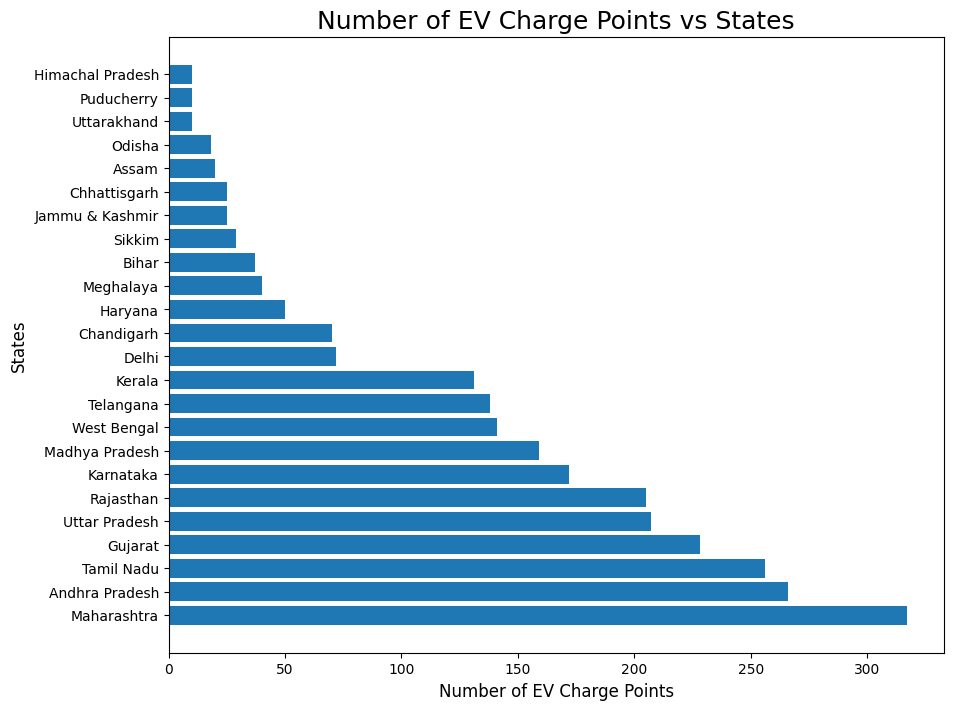

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(charge_points_per_state["State/UT-wise"], charge_points_per_state["Number of Electric Vehicle Charging Sanctioned"])
plt.title("Number of EV Charge Points vs States", fontsize=18)
plt.xlabel("Number of EV Charge Points", fontsize=12)
plt.ylabel("States", fontsize=12)
plt.xticks(rotation=0)
plt.show()

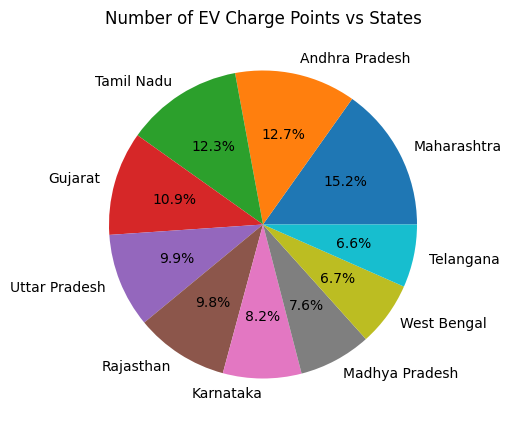

In [ ]:
top_10_charge = charge_points_per_state[:10]
plt.figure(figsize=(5,5))
plt.title("Number of EV Charge Points vs States")
plt.pie(top_10_charge["Number of Electric Vehicle Charging Sanctioned"], labels=top_10_charge["State/UT-wise"], autopct='%1.1f%%')
plt.show()

In [ ]:
car_data = pd.read_csv("/content/drive/MyDrive/car_data_modified.csv")
car_data.head()

,Brand,AccelSec,TopSpeed_KmH,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceINR
0,0,4.6,233,70.0,161,940,0,0,0,0,0,5,4549360
1,1,10.0,160,45.0,167,250,0,1,0,1,1,5,2460000
2,2,4.7,210,75.0,181,620,0,0,0,2,0,5,4628080
3,3,6.8,180,74.0,206,560,0,1,0,3,0,5,5579280
4,4,9.5,145,28.5,168,190,0,1,0,1,2,4,2705754


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             102 non-null    int64  
 1   AccelSec          102 non-null    float64
 2   TopSpeed_KmH      102 non-null    int64  
 3   Battery_Pack Kwh  102 non-null    float64
 4   Efficiency_WhKm   102 non-null    int64  
 5   FastCharge_KmH    102 non-null    int64  
 6   RapidCharge       102 non-null    int64  
 7   PowerTrain        102 non-null    int64  
 8   PlugType          102 non-null    int64  
 9   BodyStyle         102 non-null    int64  
 10  Segment           102 non-null    int64  
 11  Seats             102 non-null    int64  
 12  PriceINR          102 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 10.5 KB


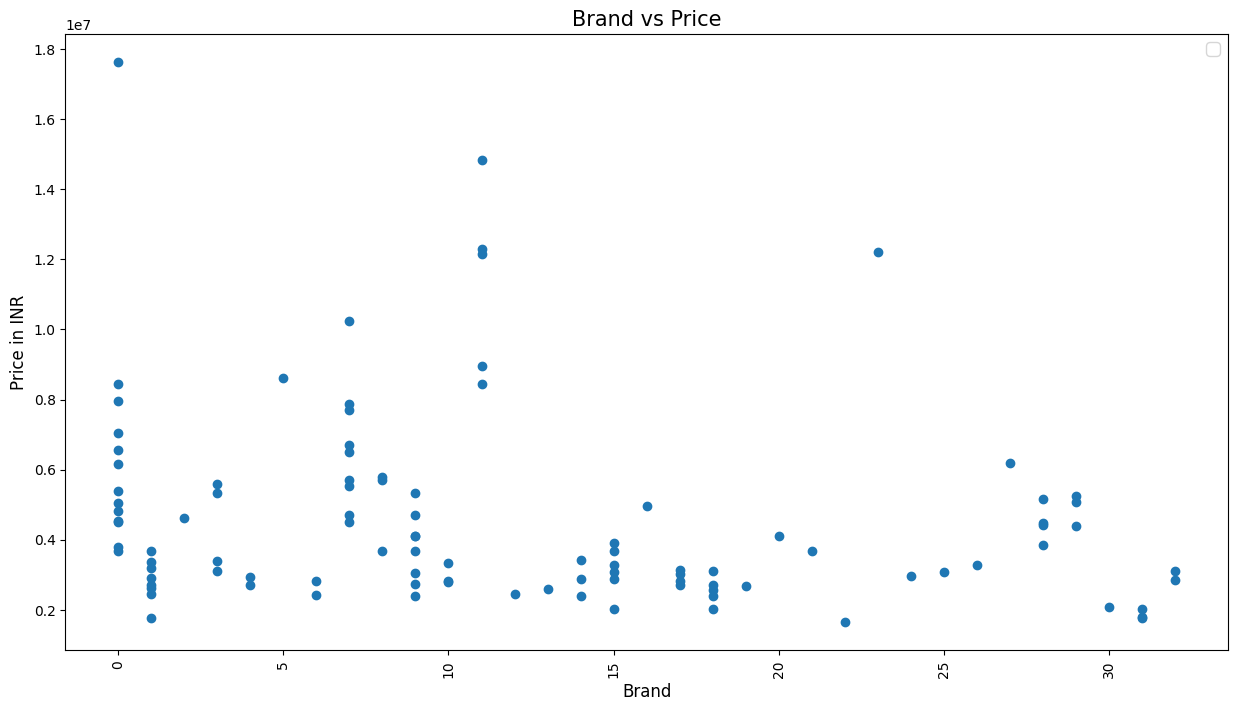

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(car_data.Brand, car_data.PriceINR)
plt.xticks(rotation=90)
plt.title("Brand vs Price", fontsize=15)
plt.ylabel("Price in INR", fontsize=12)
plt.xlabel("Brand", fontsize=12)
plt.legend(fontsize=12)
plt.show()

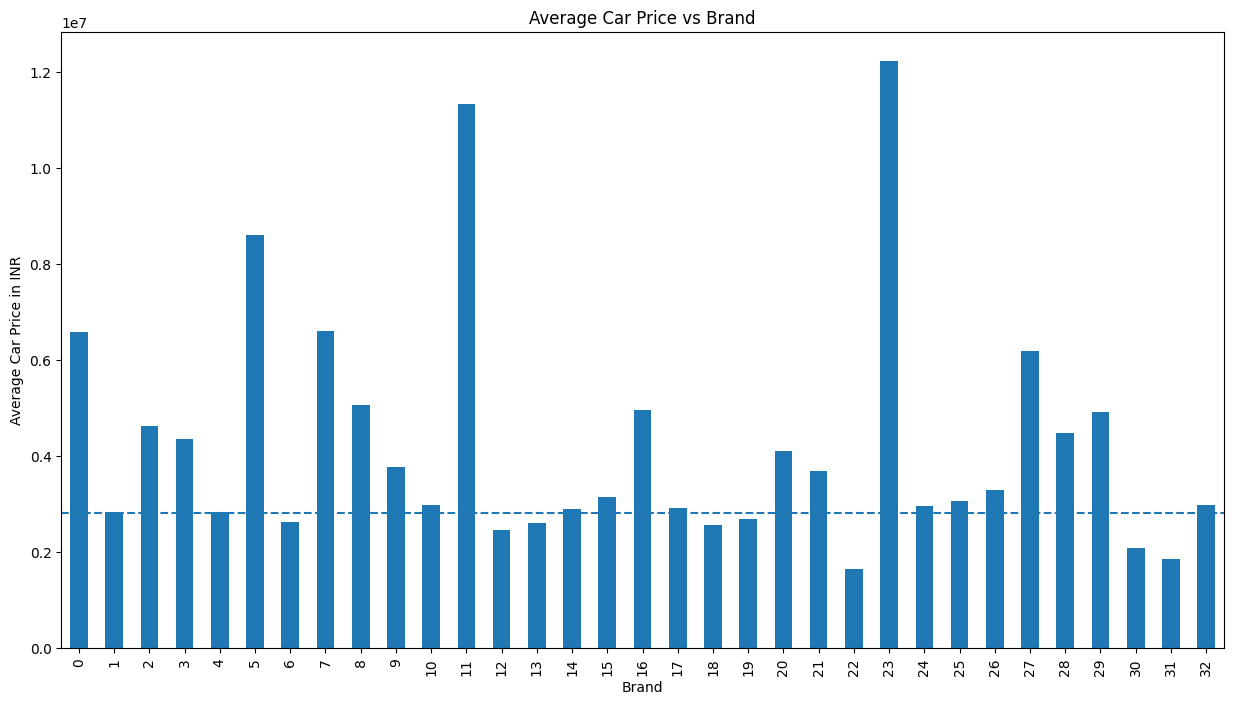

In [ ]:
%matplotlib inline
y = car_data.groupby(["Brand"])["PriceINR"].mean()
y.plot(kind="bar", figsize=(15,8))
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Average Car Price in INR")
plt.title("Average Car Price vs Brand")
plt.axhline(car_data.PriceINR.std(), linestyle="--")
plt.show()

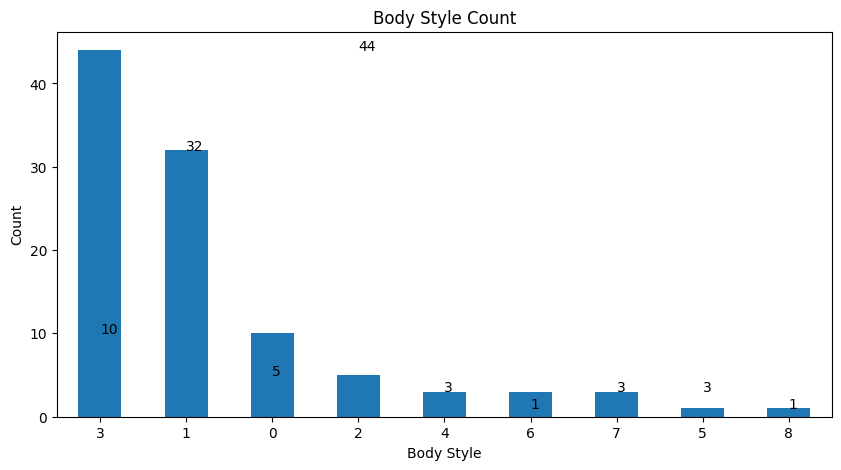

In [ ]:
y = car_data.BodyStyle.value_counts()
y.plot(kind="bar", figsize=(10,5))
plt.xticks(rotation=0)
for i in range(len(y)):
    plt.text(i,y[i],y[i])
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.title("Body Style Count")
plt.show()

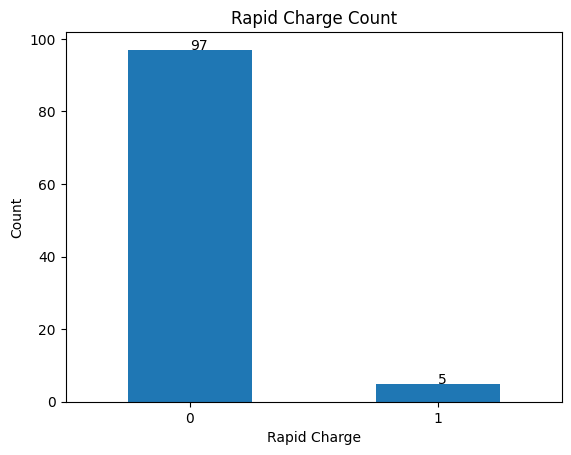

In [ ]:
y = car_data.RapidCharge.value_counts()
car_data.RapidCharge.value_counts().plot(kind="bar")
plt.xticks(rotation=0)
for i in range(len(y)):
    plt.text(i,y[i],y[i])
plt.xlabel("Rapid Charge")
plt.ylabel("Count")
plt.title("Rapid Charge Count")
plt.show()

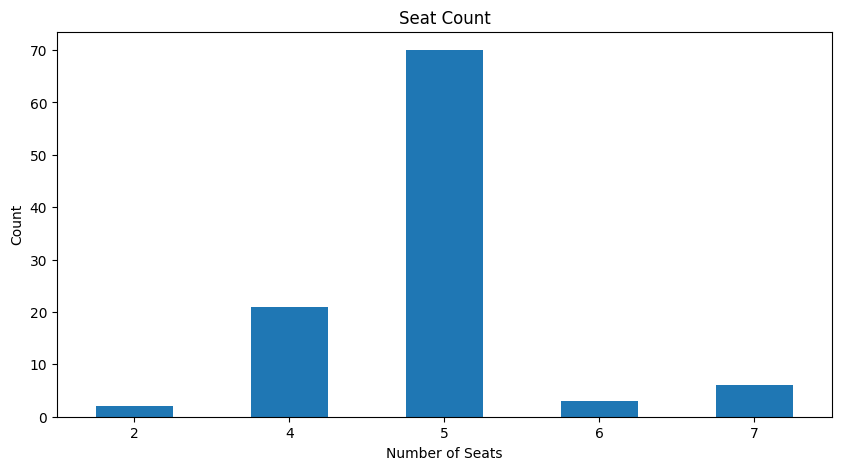

In [ ]:
y = car_data.Seats.value_counts().sort_index(ascending=True)
y.plot(kind="bar", figsize=(10,5))
plt.xticks(rotation=0)
plt.xlabel("Number of Seats")
plt.ylabel("Count")
plt.title("Seat Count")
plt.show()

In [ ]:
for label, content in car_data.items():
    if not pd.api.types.is_numeric_dtype(car_data[label]):
        lst = car_data[label].unique()
        label_map = {}
        for i in range(len(lst)):
            label_map[lst[i]] = i
        car_data[label] = car_data[label].map(label_map)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             102 non-null    int64  
 1   AccelSec          102 non-null    float64
 2   TopSpeed_KmH      102 non-null    int64  
 3   Battery_Pack Kwh  102 non-null    float64
 4   Efficiency_WhKm   102 non-null    int64  
 5   FastCharge_KmH    102 non-null    int64  
 6   RapidCharge       102 non-null    int64  
 7   PowerTrain        102 non-null    int64  
 8   PlugType          102 non-null    int64  
 9   BodyStyle         102 non-null    int64  
 10  Segment           102 non-null    int64  
 11  Seats             102 non-null    int64  
 12  PriceINR          102 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 10.5 KB


<Axes: >

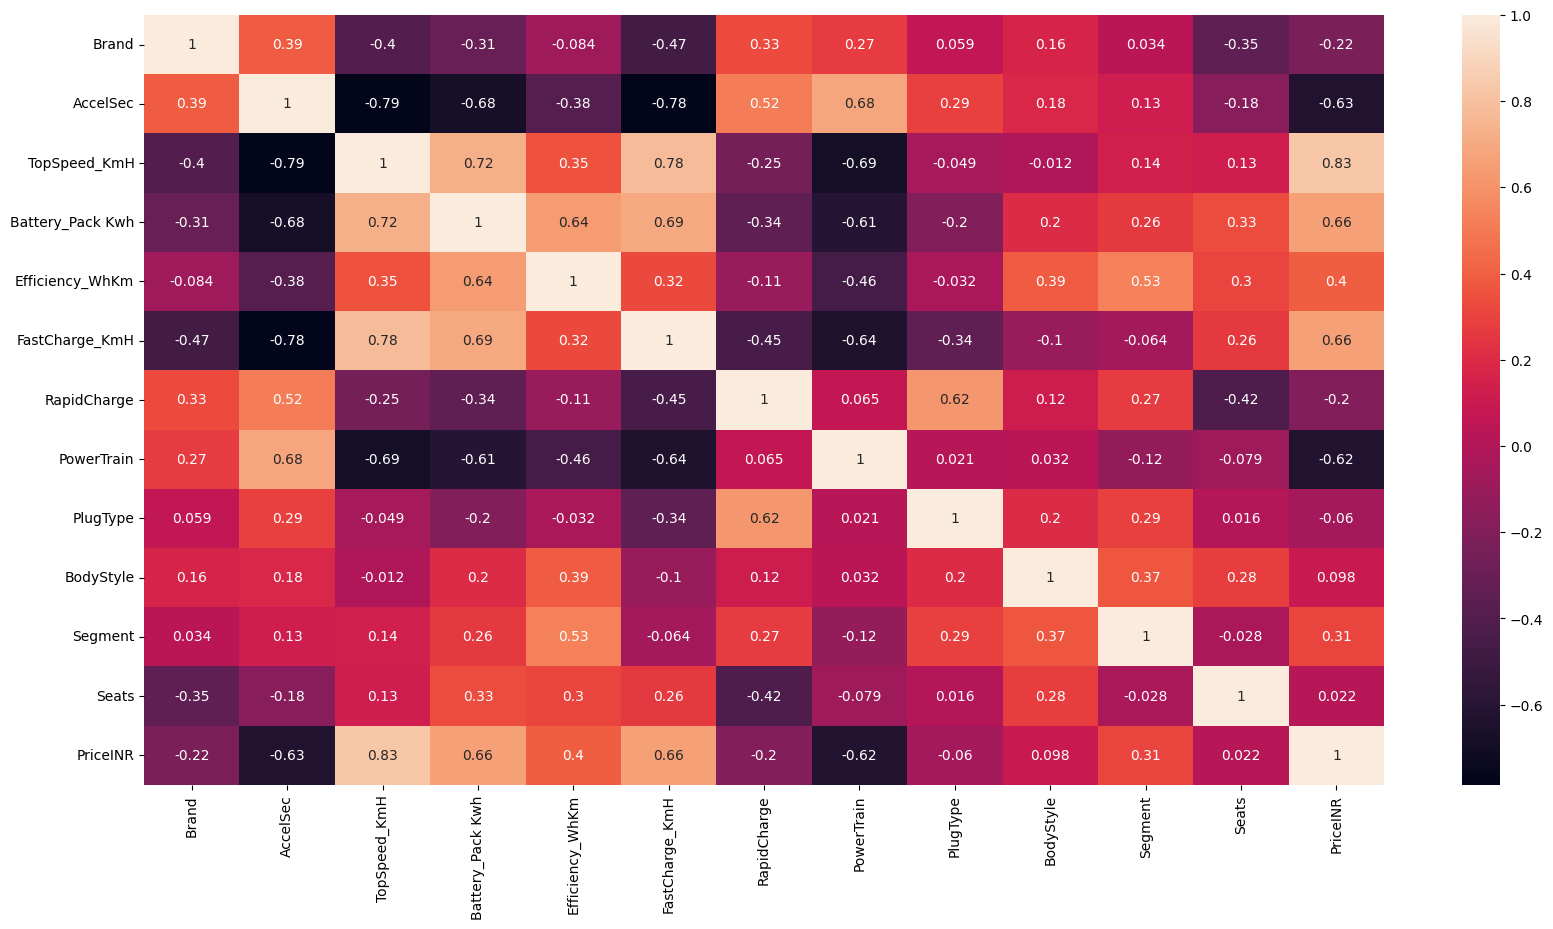

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(car_data.corr(), annot=True)

In [ ]:
car_data_modified = pd.read_csv("car_data_modified.csv")
car_data_modified.head()

In [ ]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

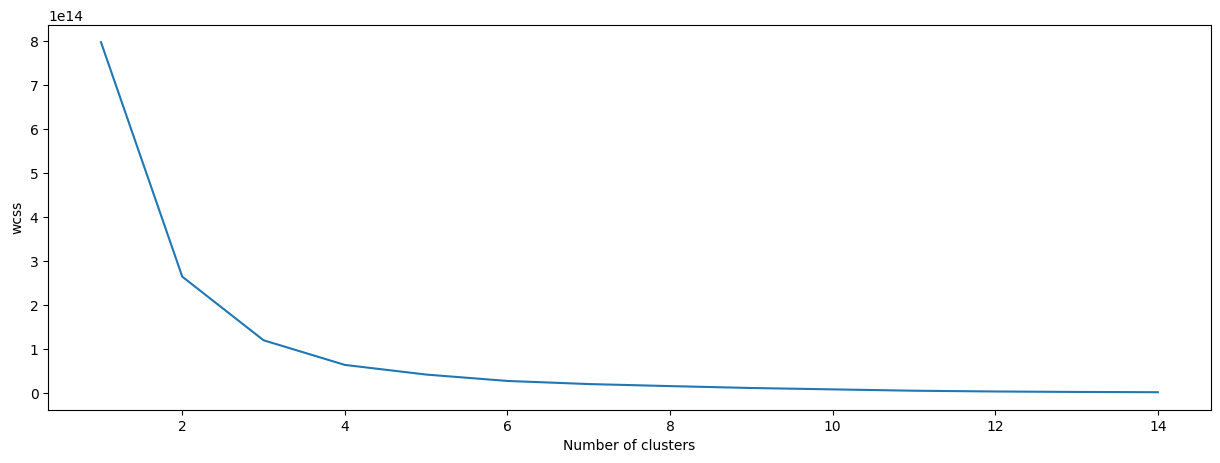

In [ ]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(car_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans = KMeans(4, init = 'k-means++', random_state=42).fit(car_data)
car_data['cluster_number'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
car_data

,Brand,AccelSec,TopSpeed_KmH,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceINR,cluster_number
0,0,4.6,233,70.0,161,940,0,0,0,0,0,5,4549360,0
1,1,10.0,160,45.0,167,250,0,1,0,1,1,5,2460000,1
2,2,4.7,210,75.0,181,620,0,0,0,2,0,5,4628080,0
3,3,6.8,180,74.0,206,560,0,1,0,3,0,5,5579280,0
4,4,9.5,145,28.5,168,190,0,1,0,1,2,4,2705754,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,9,7.5,160,63.0,191,440,0,2,0,1,1,5,3690000,1
98,7,4.5,210,86.5,258,540,0,0,0,3,5,5,7876100,3
99,9,5.9,200,63.0,194,440,0,0,0,1,1,5,4100000,0
100,9,5.1,200,87.0,232,450,0,0,0,1,1,5,5330000,0


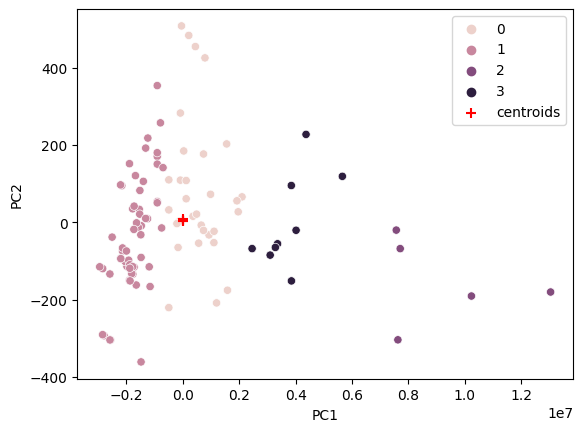

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

x = car_data.values
pca = preprocessing.scale(x)
pca = PCA(n_components=13)
pca = pca.fit_transform(x)

pf = pd.DataFrame(data=pca, columns=[f"PC{i+1}" for i in range(13)])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', c="r", s=50, label='centroids')
plt.legend()
plt.show()

In [ ]:
car_data.describe()

,Brand,AccelSec,TopSpeed_KmH,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceINR,cluster_number
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02,102.000000
mean,11.911765,7.391176,179.313725,65.415686,189.303922,435.686275,0.049020,0.950980,0.235294,2.333333,2.245098,4.882353,4.591802e+06,0.921569
std,9.690358,3.031913,43.771228,29.955782,29.679072,220.447384,0.216975,0.871751,0.647562,1.678833,1.820871,0.799680,2.808559e+06,0.840630
min,0.000000,2.100000,123.000000,16.700000,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.650578e+06,0.000000
25%,3.250000,5.100000,150.000000,43.125000,168.000000,260.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.822010e+06,0.000000
50%,9.500000,7.300000,160.000000,64.350000,180.500000,440.000000,0.000000,1.000000,0.000000,3.000000,2.000000,5.000000,3.690000e+06,1.000000
75%,18.000000,9.000000,200.000000,83.700000,204.500000,557.500000,0.000000,2.000000,0.000000,3.000000,3.000000,5.000000,5.330000e+06,1.000000
max,32.000000,22.400000,410.000000,200.000000,273.000000,940.000000,1.000000,2.000000,3.000000,8.000000,7.000000,7.000000,1.763000e+07,3.000000


In [ ]:
car_data.nunique()

Brand               33
AccelSec            55
TopSpeed_KmH        25
Battery_Pack Kwh    49
Efficiency_WhKm     54
FastCharge_KmH      50
RapidCharge          2
PowerTrain           3
PlugType             4
BodyStyle            9
Segment              8
Seats                5
PriceINR            87
cluster_number       4
dtype: int64

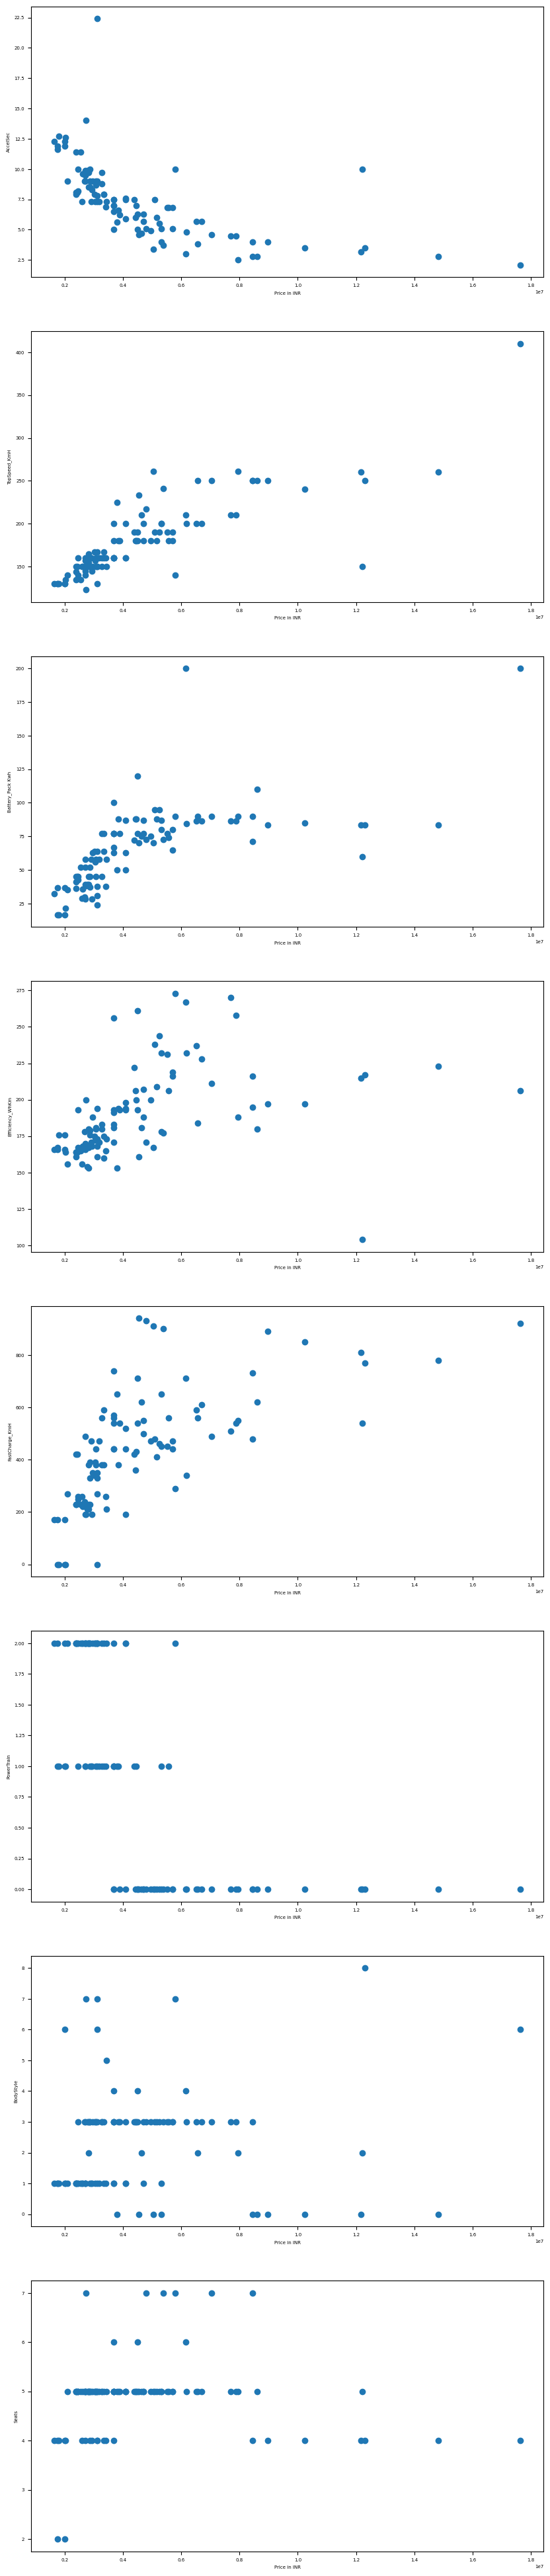

In [ ]:
lst = (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)
cols = ["AccelSec", "TopSpeed_KmH", "Battery_Pack Kwh", "Efficiency_WhKm", "FastCharge_KmH","PowerTrain", "BodyStyle", "Seats"]
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)) = plt.subplots(nrows=8, ncols=1, figsize=(10,50))
plt.rcParams.update({'font.size':5})
for i in range(len(lst)):
    ax = fig.axes[i]
    ax.scatter(car_data["PriceINR"], car_data[cols[i]])
    ax.set(xlabel="Price in INR", ylabel=cols[i])

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [ ]:
cross_topSpeed = pd.crosstab(car_data['cluster_number'], car_data['TopSpeed_KmH'])
cross_topSpeed

TopSpeed_KmH,123,130,135,140,144,145,150,155,157,160,...,210,217,225,233,240,241,250,260,261,410
cluster_number,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,0,2,...,2,1,0,1,0,1,1,0,1,0
1,1,7,3,3,1,2,14,2,2,13,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,2,0,1
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,0,5,0,1,0


In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [200, 40]
plt.rcParams['font.size'] = 100
mosaic(cross_topSpeed.stack(), horizontal=False)
plt.show()

In [ ]:
cross_seats = pd.crosstab(car_data['cluster_number'], car_data['Seats'])
cross_seats

Seats,2,4,5,6,7
cluster_number,,,,,
0,0,0,26,2,3
1,2,14,39,1,1
2,0,4,1,0,0
3,0,3,4,0,2


In [ ]:
%matplotlib inline
plt.figure()
mosaic(cross_seats.stack())
plt.show();

<Figure size 20000x4000 with 0 Axes>

In [ ]:
cross_acc = pd.crosstab(car_data["cluster_number"], car_data["AccelSec"])
cross_acc

AccelSec,2.1,2.5,2.8,3.0,3.2,3.4,3.5,3.7,3.8,4.0,...,9.9,10.0,11.4,11.6,11.9,12.3,12.6,12.7,14.0,22.4
cluster_number,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,1,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,2,2,1,2,2,1,1,1,1
2,1,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,2,0,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [200, 40]
plt.rcParams['font.size'] = 100
mosaic(cross_acc.stack(), horizontal=False)
plt.show();

Maharashtra has most EV vehicles running and also has the most EV charging station available.

The costliest EV car is by Tesla.

The cheapest EV car is by SEAT.

Cluster2 has the msot plotpoints in AcceSec.

As the Acceleration/Sec Decrease the pirce of the car Increase

As the Top Speed Increase the price of the the car Increase.

As the Battery Pack Increase the price of the car Increase.



# **Marketing Mix** 

-Most of the production is of 5 seater cars.

-Average Price in INR range between[Rs. 25,00,000 - Rs. 50,00,000].

-Most of the production is of SUv AND Hatchback BodyStyle vechicles.

-Most of the production is with the  Rapid Charge Feature.

-Average Price in Accelearation/Sec range between [5.0-8.5].

-Average Efficency ranges from [160-200] Whkm.

